# COMP3115/4115: Exploratory Data Analysis and Visualization
# Project

Student Name: FENG Zixuan LEI Hao

Student Number:18253008

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_small.csv')

X = df.drop(['MachineIdentifier'],axis=1)
X.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [13]:
percent = (X.isnull().sum()/X.shape[0]) * 100
new_X= pd.DataFrame(data=percent,columns=['Percentofnullvalues'])
new_X = new_X.sort_values(by='Percentofnullvalues',ascending=False)
print(new_X.head(10))

                            Percentofnullvalues
PuaMode                               99.969997
Census_ProcessorClass                 99.579958
DefaultBrowsersIdentifier             95.279528
Census_IsFlightingInternal            83.088309
Census_InternalBatteryType            71.197120
Census_ThresholdOptIn                 63.716372
Census_IsWIMBootEnabled               63.606361
SmartScreen                           36.033603
OrganizationIdentifier                30.273027
SMode                                  6.090609


In [14]:
# Drop the features with more 70 percent null values
X = X.drop(['PuaMode','Census_ProcessorClass','DefaultBrowsersIdentifier','Census_IsFlightingInternal','Census_InternalBatteryType'],axis=1)
X.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,1.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,1.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,1.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,1.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,1.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 77 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ProductName                                        9999 non-null   object 
 1   EngineVersion                                      9999 non-null   object 
 2   AppVersion                                         9999 non-null   object 
 3   AvSigVersion                                       9999 non-null   object 
 4   IsBeta                                             9999 non-null   int64  
 5   RtpStateBitfield                                   9965 non-null   float64
 6   IsSxsPassiveMode                                   9999 non-null   int64  
 7   AVProductStatesIdentifier                          9969 non-null   float64
 8   AVProductsInstalled                                9969 non-null   float64
 9   AVProduc

In [31]:
# Find out numerical features, categorical features and binary features in the dataset and storing them in separate lists
def types_of_features(data):
    total_features = data.columns
    numerical_features = list(data._get_numeric_data().columns)
    categorical_features = list(set(total_features) - set(numerical_features))
    binary_features = []
    for i in numerical_features:
        if (data[str(i)].min() == 0 and data[str(i)].max() == 1) and data[str(i)].min()== 0:
    
           binary_features.append(i)
    
    numerical_features = list(set(numerical_features)- set(binary_features))

  
    return numerical_features,binary_features,categorical_features


numerical_features,binary_features,categorical_features = types_of_features(X)


0    18.0
1    18.0
2    18.0
3     NaN
4     NaN
Name: OrganizationIdentifier, dtype: float64

In [17]:
# clean category values to reduce null for smartscreen feature 
def replace_smartscreen(x):
    if x in 'ExistsNotSet':
        return 'ExistsNotSet'
    elif x in 'RequireAdmin':
        return 'RequireAdmin'
    elif x in 'Off':
        return 'Off'
    elif x in 'Prompt':
        return 'Prompt'
    elif x in 'Block':
        return 'Block'
    elif x in 'Warn':
        return 'Warn'
    elif x in 'On':
        return 'On'
    else:
        return 'unknown'
    
def replace_PrimaryDiskTypeName(X):
    if x in 'HDD':
        return 'HDD'
    elif x in 'SSD':
        return 'SSD'
    elif x in 'UNKNOWN':
        return 'unknown'
    elif x in 'Unspecified':
        return 'unknown'
    else:
        return 'unknown'
    
     
def fill_missing_values(data,features):
    ''' Filling missing values and replacing not useful categories to unknown category '''
    numerical_features = features[0]
    binary_features = features[1]
    categorical_features = features[2]
    # replacing null values with -1 in in numerical features
    for feature in numerical_features:
        data[feature] = data[feature].fillna(-1)
    # replaceing null values with mode value of that feature in binary features
    for feature in binary_features:
        data[feature] = data[feature].fillna(data[feature].mode()[0])
    data['SmartScreen'] = data['SmartScreen'].apply(replace_smartscreen) 
    data['SmartScreen'] = data['SmartScreen'].astype('category')
    data['Census_OSSkuName'] = data['Census_OSSkuName'].apply(replace_skuname)
    data['Census_OSSkuName'] = data['Census_OSSkuName'].astype('category')
    data['Census_OSEdition'] = data['Census_OSEdition'].apply(replace_edition)
    data['Census_OSEdition'] = data['Census_OSEdition'].astype('category') 
    data['Census_ActivationChannel'] = data['Census_ActivationChannel'].apply(replace_channel)
    data['Census_ActivationChannel'] = data['Census_ActivationChannel'].astype('category')     
    data['Census_ChassisTypeName'].replace(['UNKNOWN','Unknown','Other'],'unknown',inplace=True)
    data['Census_PowerPlatformRoleName'].replace(['UNKNOWN','Unspecified'],'unknown',inplace=True)
    data['Census_FlightRing'].replace(['Invalid','Unknown'],'unknown',inplace=True)
    data['Census_OSSkuName'].replace(['UNDEFINED'],'unknown',inplace=True)
    data['SkuEdition'].replace(['Invalid'],'unknown',inplace=True)
    data['Census_OSWUAutoUpdateOptionsName'].replace(['UNKNOWN'],'unknown',inplace=True)
    data['Census_GenuineStateName'].replace(['UNKNOWN'],'unknown',inplace=True)

    # replacing null values by adding category called 'unknown' in categorical features
    for feature in categorical_features:
        if 'unknown' not in data[feature].cat.categories:
            data[feature] = data[feature].cat.add_categories(['unknown'])
            data[feature] = data[feature].fillna('unknown')
        else:
            data[feature] = data[feature].fillna('unknown')

    return data

# replace_smartscreen(X)



In [52]:
def list_to_df(list):
    reData=pd.DataFrame()
    for i in range(len(list)):
        reData[list[i]]=df[list[i]]
        i=i+1
    reData['HasDetections']=df['HasDetections']
    return reData
dfForMatrix=list_to_df(numerical_features)
# dfForMatrix.head()

,IsBeta,OrganizationIdentifier,OsSuite,OsBuild,AVProductStatesIdentifier,Census_InternalPrimaryDisplayResolutionHorizontal,Census_OEMNameIdentifier,LocaleEnglishNameIdentifier,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_IsFlightsDisabled,...,Census_ProcessorCoreCount,Census_ThresholdOptIn,IeVerIdentifier,AVProductsInstalled,GeoNameIdentifier,RtpStateBitfield,Census_TotalPhysicalRAM,CountryIdentifier,Census_FirmwareVersionIdentifier,HasDetections
0,0,18.0,256,17134,53447.0,1440.0,2668.0,171,18.9,0.0,...,4.0,NaN,137.0,1.0,35,7.0,4096.0,29,36144.0,0
1,0,18.0,256,17134,53447.0,1366.0,2668.0,64,13.9,0.0,...,4.0,NaN,137.0,1.0,119,7.0,4096.0,93,57858.0,0
2,0,18.0,768,17134,53447.0,1920.0,4909.0,49,21.5,0.0,...,4.0,NaN,137.0,1.0,64,7.0,4096.0,86,52682.0,0
3,0,NaN,256,17134,53447.0,1366.0,1443.0,115,18.5,0.0,...,4.0,NaN,137.0,1.0,117,7.0,4096.0,88,20050.0,1
4,0,NaN,768,17134,53447.0,1366.0,1443.0,75,14.0,0.0,...,4.0,0.0,137.0,1.0,277,7.0,6144.0,18,19844.0,1


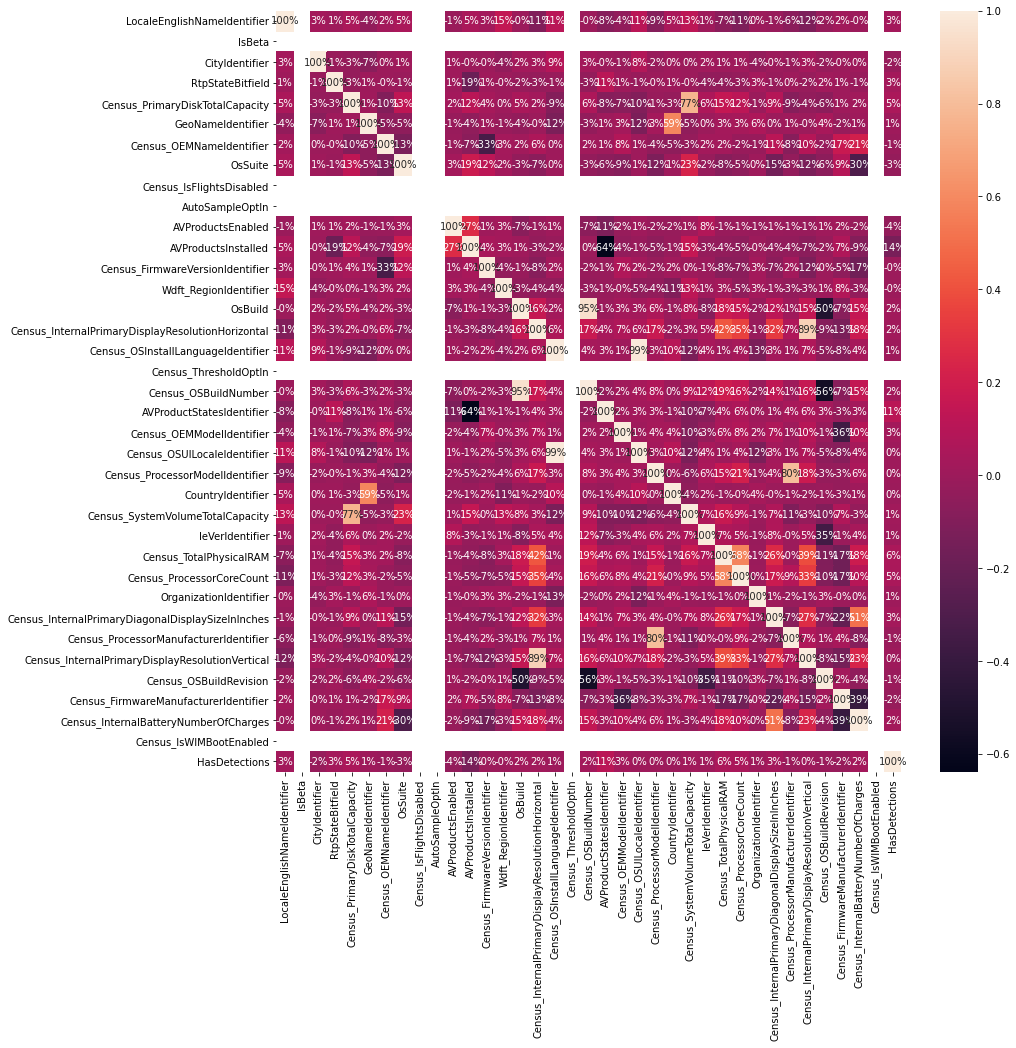

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
def correlated_Matrix(numerical_features):
    plt.figure(figsize=(14,14))
    sns.heatmap(numerical_features.corr(), annot=True, fmt='.0%')
# dfForMatrix.head()
    
correlated_Matrix(dfForMatrix)

<AxesSubplot:xlabel='HasDetections', ylabel='count'>

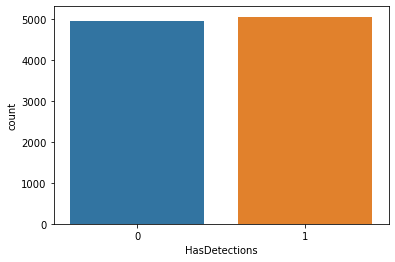

In [56]:
# The distribution of the target variable 'HasDetections' 
sns.countplot(x='HasDetections',data=df)